# 신경망(Neural Network) - 신경망 기초

* 신경망: 입력 데이터에 가중치를 곱하고 편향을 더한 후 활성화함수를 적용하는 연산을 수행하는 층(layer)를 여러 개 적용하여 정답(레이블)을 추론하는 연산 기법. 레이블을 정확하게 추론하도록 매개변수(가중치와 편향)(paremeter)를 최적화시키는 과정을 딥러닝이라고 함.

### 용어
* 층(Layer): 매개변수 적용을 수행하는 계층(입력(픽셀) - 은닉층 - 은닉층 - 출력층)
* 뉴런(Neuron): 각 레이어를 구성하는 값
* 픽셀(Pixel): 이미지의 밝기/색상을 결정하는 값
* 매개변수(Parameter): 곱하거나 더하는 값(가중치 weights, 편향 bias)
* 레이블(Label): 각 이미지의 의미(클래스 class)
* 활성화함수(Activation Function): 각 레이어 사이에 적용하여 비선형성을 도입하는 연산

### 3층 신경망의 구현: 입력(x) → 매개변수(가중치 W, 편향 b) 및 활성화 함수 → 출력(y, 확률)
* 1층: z1 = sigmoid(x * W1 + b1) → z1 = sigmoid(np.dot(x, W1) + b1)
* 2층: z2 = sigmoid(z1 * W2 + b2) → z2 = sigmoid(np.dot(z1, W2) + b2)
* 3층: y = softmax(z2 * W3 + b3) → y = softmax(np.dot(z2, W3) + b3)

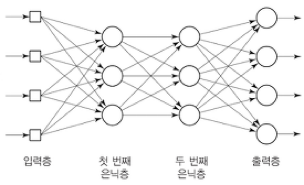

### 퍼셉트론(Perceptron)
* 입력된 신호에 가중치를 곱하고 편향을 더하여 원하는 출력을 얻을 수 있는 처리 구조 (출력 = 0 / 1)
* 가중치(weights): 신호의 증폭(scale)
* 편향(bias): 신호의 이동(shift)
* 신경계의 신호 전달 방식과 유사
* 딥러닝 인공 신경망 원리의 초기 버전

### 활성화함수(Activation Function)
* 시그모이드(sigmoid): `return 1 / (1 + np.exp(-x))`
    * 입력 0을 중심으로 0에서 1까지 출력이 부드럽게 변화하므로 미분 가능
    $$
    Sigmoid(x) = \frac{1}{1 + e^{-x}}
    $$
* 렐루(Relu): `return np.maximum(0, x)`
    * 입력이 0보다 크면 그 값을 그대로 리턴하고, 작은 경우에는 0을 리턴
    $$
    ReLU(x)=Maximum(0,x)
    $$

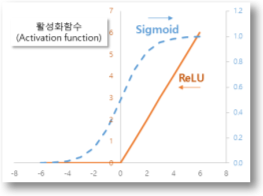
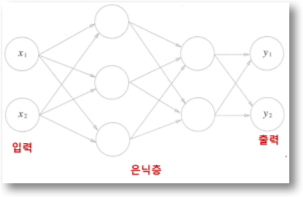

### 활성화 함수의 의미
* 뉴런을 통과하면서 비선형적으로 연산되도록 하여 신경망이 작동되도록 유도
* 선형함수인 경우 복층화의 의미가 없음
* 주로 0 ~ 1 사이의 값으로 수렴되도록 유도
* 연속적인 미분값(기울기)을 얻을 수 있어 학습에 유리

### 활성화 함수의 구현 및 그래프

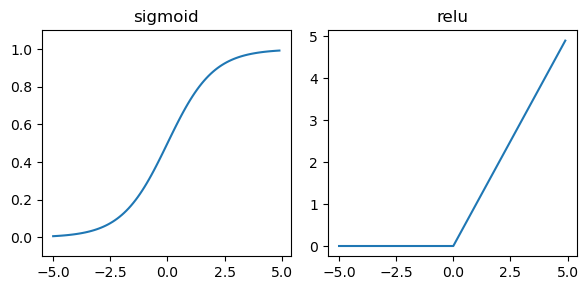

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

fig, axes = plt.subplots(1, 2, figsize=(6, 3)) # 1행 2열

# sigmoid
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
axes[0].plot(X, Y)
axes[0].set_title("sigmoid")
axes[0].set_ylim(-0.1, 1.1)

# relu
Y = relu(X)
axes[1].plot(X, Y)
axes[1].set_title("relu")

plt.tight_layout()
plt.show()

### 소프트맥스(softmax) 함수: 출력층의 활성화함수

$$
Softmax(a) = \frac{\exp(a_k)}{\sum_{1}^{n} \exp(a_k)} = \frac{\exp(a_k - C')}{\sum_{1}^{n} \exp(a_k - C')} \quad (\text{단, } C' = \max(a))
$$

* 출력 뉴런의 합 = 1, 각 뉴런의 값은 0 ~ 1 사이의 값
* 소프트맥스 출력값은 **확률**(신경망의 출력)
* 구현
  ```python
  def softmax(x):
      x = x - np.max(x)  # 오버플로우 대책: x의 값이 큰 경우 exp(x)의 값이 지나치게 증가
      return np.exp(x) / np.sum(np.exp(x))
  ```